In [2]:
import sklearn.datasets
dataset = sklearn.datasets.load_iris()
dataset



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
import numpy as np
data = dataset['data']
labels = dataset['target']
var_names = dataset['feature_names']
target_names = dataset['target_names']
print(var_names)
print(np.unique(labels))
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


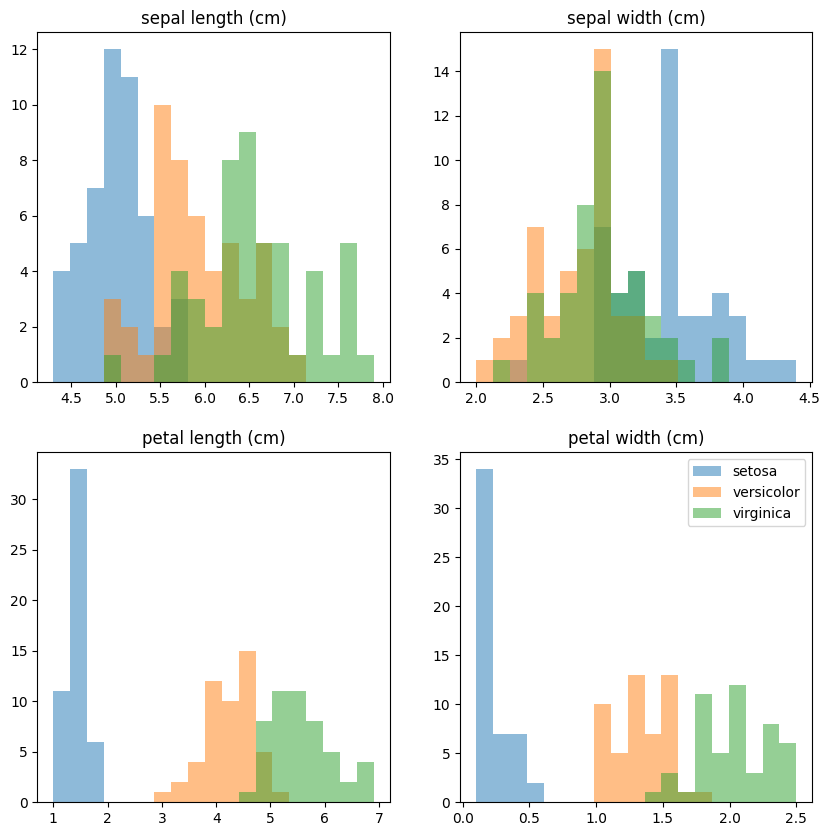

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

# loop on variables
for i in range(4):
    # create subplot 
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend()

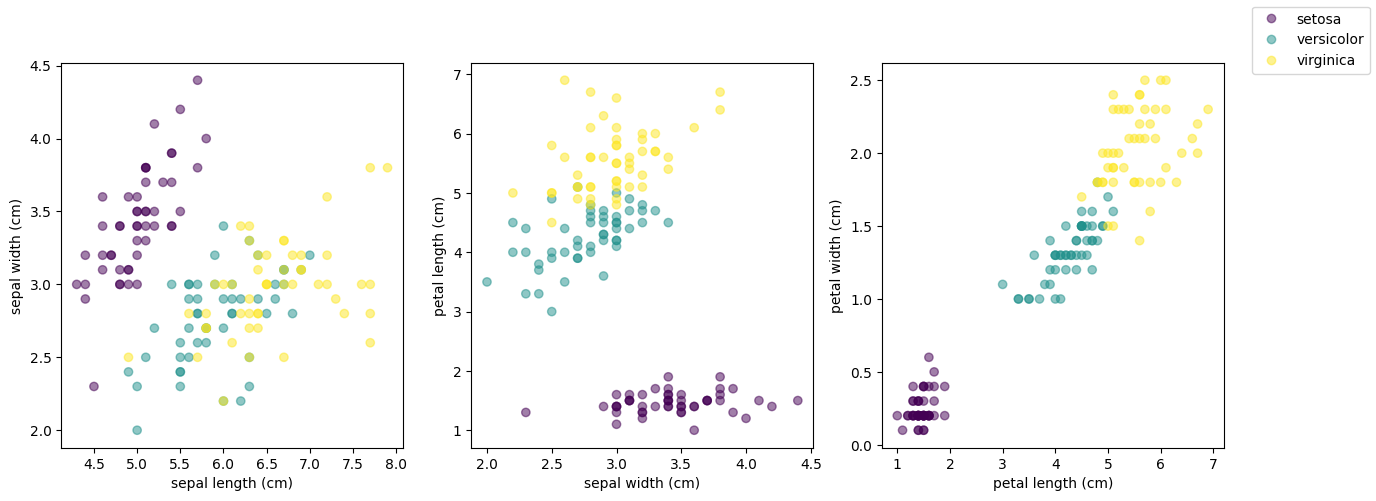

In [5]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems)

In [7]:
%%capture
%pip install seaborn==0.10.0;
import pandas as pd
df = pd.DataFrame(data, 
                  columns=['sepal_length',
                           'sepal_width',
                           'petal_length',
                           'petal_width'])


In [8]:
df['species'] = labels 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


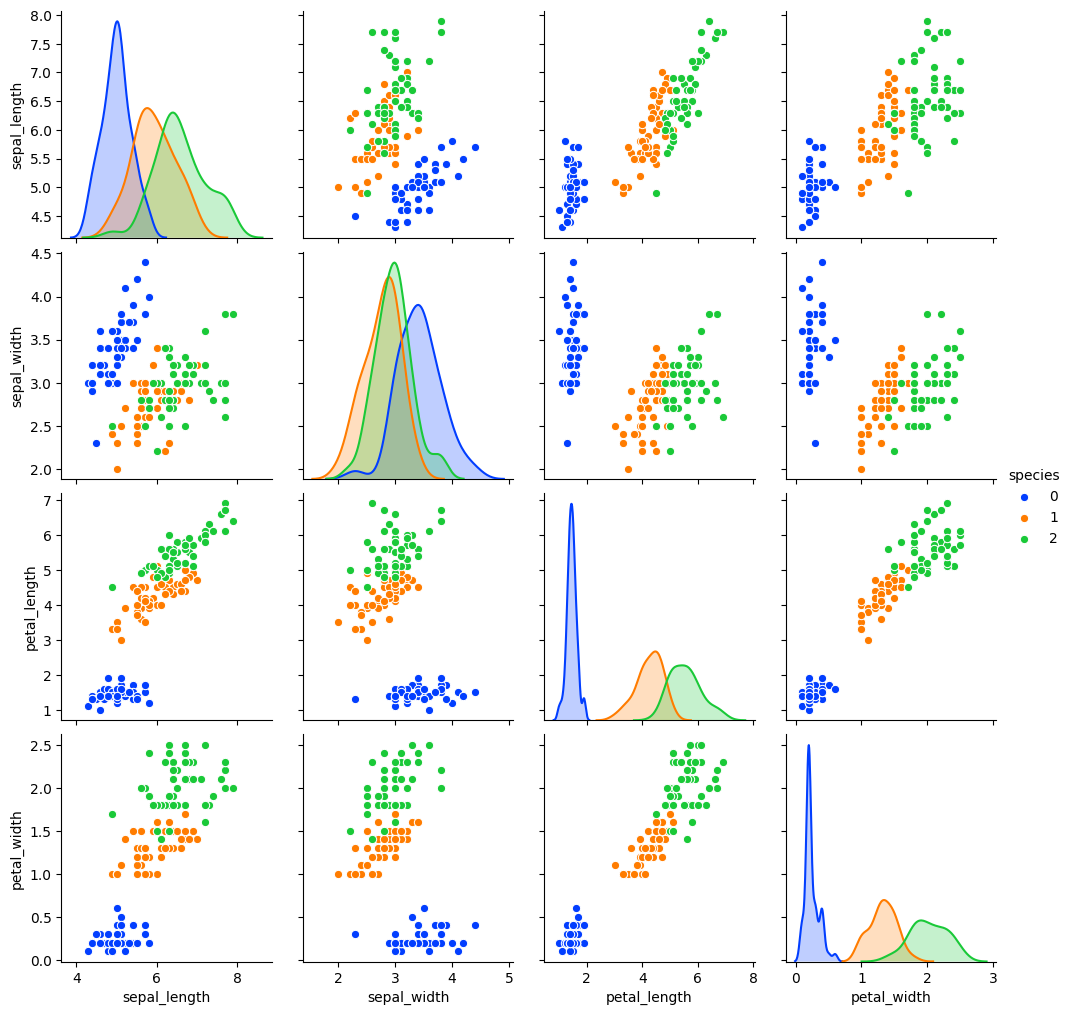

In [9]:
import seaborn as sns
sns.pairplot(df, hue="species", palette='bright');

In [10]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)

In [11]:
view.shape


(150, 2)

Text(0, 0.5, 'PCA-2')

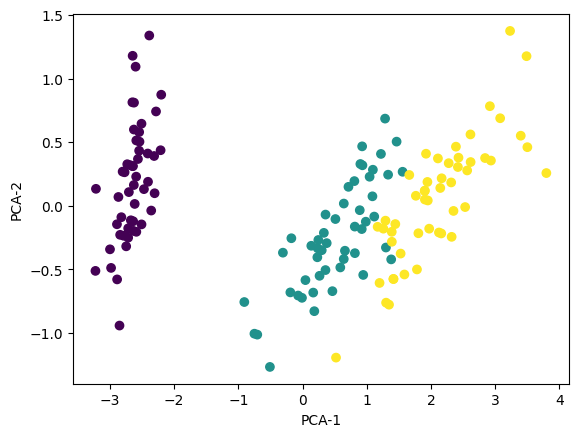

In [13]:
plt.scatter(view[:,0], view[:,1], c=labels)
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')

Text(0, 0.5, 'y')

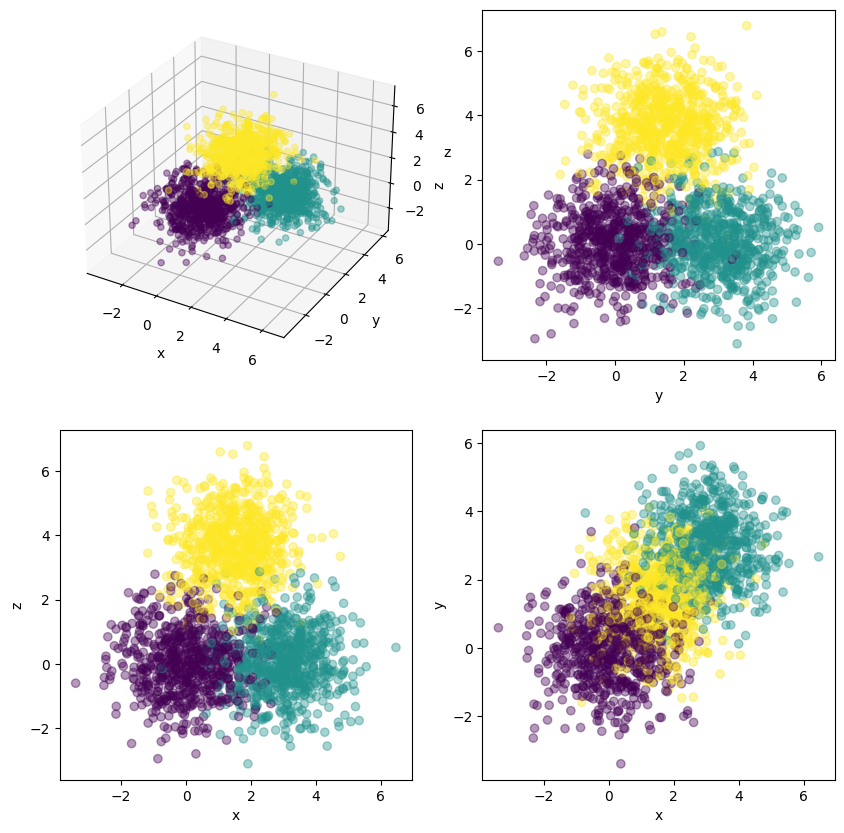

In [14]:
import sklearn.datasets
import math
a = 3
c = math.sqrt(2*a**2)
h = math.sqrt(3)/2. * c
data, labels = sklearn.datasets.make_blobs(n_samples=2000, 
                                           n_features=3, 
                                           centers=[[0,0,0], 
                                                    [a,a,0], 
                                                    [a/2, a/2, h]])
import mpl_toolkits.mplot3d.axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(221, projection='3d')
alpha=0.4
ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(222)
ax.scatter(data[:,1], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax = fig.add_subplot(223)
ax.scatter(data[:,0], data[:,2], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax = fig.add_subplot(224)
ax.scatter(data[:,0], data[:,1], c=labels, alpha=alpha)
ax.set_xlabel('x')
ax.set_ylabel('y')

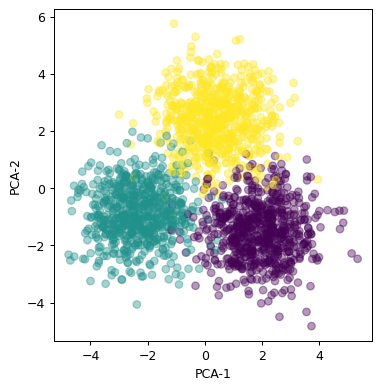

In [15]:
view = pca.fit_transform(data)
fig = plt.figure(dpi=90)
ax = fig.add_subplot(111)
ax.scatter(view[:,0], view[:,1], c=labels, alpha=alpha)
ax.set_xlabel('PCA-1')
ax.set_ylabel('PCA-2')
ax.set_aspect('equal')